In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
total_hit = pd.read_csv('hit_total.csv', index_col=False).drop('idx', axis=1)
total_hit

,code,avg,slg,bbk,wpa,re24,obp
0,50066,0.226,0.343,0.214,0.000,0.000,0.259
1,50165,0.268,0.545,0.405,-0.007,0.050,0.355
2,50202,0.291,0.350,0.633,0.000,0.000,0.355
3,50293,0.239,0.310,0.400,-0.002,-0.120,0.321
4,50350,0.268,0.364,0.513,-0.014,-0.200,0.328
...,...,...,...,...,...,...,...
297,79465,0.245,0.286,0.457,-0.001,-0.245,0.335
298,79608,0.302,0.441,0.867,0.003,-0.070,0.368
299,79705,0.241,0.392,0.431,0.000,0.000,0.319
300,99606,0.293,0.418,0.327,0.000,-0.260,0.367


### 선수 3명 비교 가능한 Radar Chart

['A', 'B', 'C']


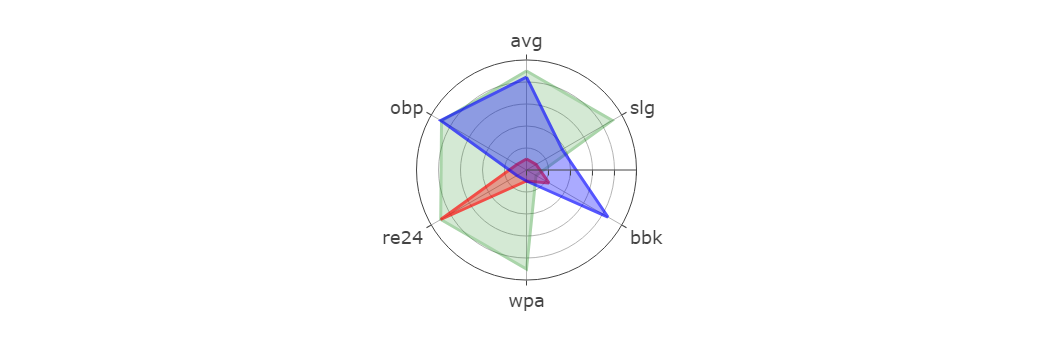

In [365]:
# Radar Chart 동적 코딩 (범례 X)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import math
import scipy.stats as stats
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import warnings
warnings.filterwarnings('ignore')

def convert_to_float(lst):
    return [float(x) for x in lst]

def visualize(L):
    pithit = L[1]
    lenL = int((len(L)-2) / 7)
    inputs = []
    for split in range(lenL):
        smallL = L[2+(split*7):9+(split*7)]
        inputs.append(smallL)
    
    names = []
    
    if pithit == 'hit':
        max = [ 0.300, 0.478, 0.780, 0, 0, 0.376]
        min = [ 0.214, 0.288, 0.242, -0.013, -0.245, 0.272]
        
        sc = []
        
        for playerinput in inputs:
            playerlist = convert_to_float(playerinput[:6])
            name = playerinput[6]
            for i, n in enumerate(playerlist):
                if n < min[i]:
                    n = min[i]
                elif n > max[i]:
                    n = max[i]
                
                x = round((n- min[i]) * (8 / (max[i] - min[i])) + 1, 2)
                sc.append(x)
            names.append(name)
    #######################################
    else:
        
        max = [ 6.409 , 0.056, 3.434, 0.0743, 1.33, 1.8138]
        min = [ 3.156, 0.032, 1.12, -0.0839, -0.495, 1.2461]
        
        sc = []
        
        for playerinput in inputs:
            playerlist = convert_to_float(playerinput[:6])
            name = playerinput[6]
            for i, n in enumerate(playerlist):
                if n < min[i]:
                    n = min[i]
                elif n > max[i]:
                    n = max[i]
                
                x = round((n- min[i]) * (8 / (max[i] - min[i])) + 1, 2)
                sc.append(x)
            names.append(name)
    #######################################
    
    numsc = int(len(sc) / 6)
    if pithit == 'pit':    
        for num in range(numsc):
            sc[num*6]  =  10 - sc[num*6]
            sc[5+num*6]  =  10 - sc[5+num*6]
    
    #######################################
    
    if not pithit == 'hit': 
        colnames = ['era', 'kpit', 'kbb', 'wpa', 're24', 'whip']
    else:
        colnames = ['avg', 'slg', 'bbk', 'wpa', 're24', 'obp']
    
    fig = px.line_polar(r = sc[:6], 
                       theta = colnames,
                        
                       template = 'presentation', # presentation, gridon
                       color_discrete_sequence=['Green'],
                      range_r = [0, 10],
                       line_close = True,     
                    )
    
    fig.update_traces(fill='toself',
                      opacity=1/(numsc),
                     visible=True,

                     )
    
    
    colors = ['Red','blue' ]
    for i in range(1, numsc):
        fig2 = px.line_polar(r = sc[i*6:(i+1)*6], 
                       theta = colnames,
                      
                       template = 'presentation', 
                       color_discrete_sequence=[colors[i-1]], #Plasma_r,
                       range_r = [0, 10],
                       line_close = True,
                        
                            )
        
        fig2.update_traces(fill='toself',opacity=2/(numsc),)
        
        fig.add_traces(fig2.data)
    
    fig.update_layout(
    polar=dict(
        radialaxis_showticklabels=False,
        radialaxis=dict(visible = True, showticklabels = False)
        #radialaxis_visible=False,  # 반지름 축 보이기 
        #angularaxis=dict(visible=False)  # 각도 축 숨기기
    ),
    showlegend=True  # 범례 숨기기

    # paper_bgcolor='rgba(0,0,0,0)'  # 종이 배경 색상 설정 (투명)
    )

    
    print(names)
    fig.show()

L = ['visualize.py', 'hit',
0.375,0.958,0.0,0.063,1.03,0.375,'A',
0.211,0.263,0.333,-0.024,0.1,0.25,'B',
0.294,0.353,0.75,-0.027,-0.37,0.381, 'C']

visualize(L)

['안치홍', '양현종', '최형우']


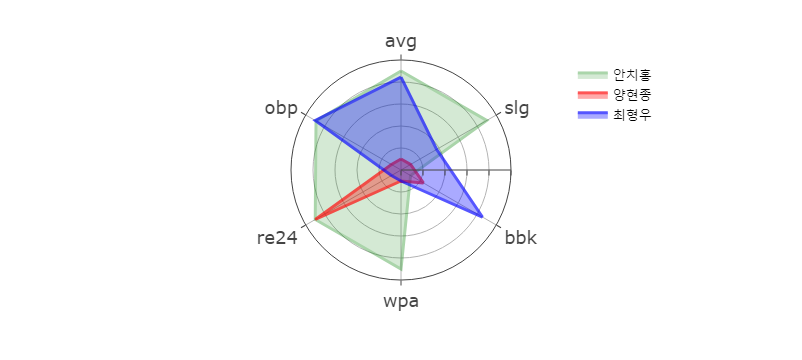

In [154]:
# Line_polar 동적 코딩 (범례 추가)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import math
import scipy.stats as stats
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import warnings
warnings.filterwarnings('ignore')

def convert_to_float(lst):
    return [float(x) for x in lst]

def visualize(L):
    pithit = L[1]
    lenL = int((len(L)-2) / 7)
    inputs = []
    for split in range(lenL):
        smallL = L[2+(split*7):9+(split*7)]
        inputs.append(smallL)
    
    names = []
    
    if pithit == 'hit':
        max = [ 0.300, 0.478, 0.780, 0, 0, 0.376]
        min = [ 0.214, 0.288, 0.242, -0.013, -0.245, 0.272]
        
        sc = []
        
        for playerinput in inputs:
            playerlist = convert_to_float(playerinput[:6])
            name = playerinput[6]
            for i, n in enumerate(playerlist):
                if n < min[i]:
                    n = min[i]
                elif n > max[i]:
                    n = max[i]
                
                x = round((n- min[i]) * (8 / (max[i] - min[i])) + 1, 2)
                sc.append(x)
            names.append(name)
    #######################################
    else:
        
        max = [ 6.409 , 0.056, 3.434, 0.0743, 1.33, 1.8138]
        min = [ 3.156, 0.032, 1.12, -0.0839, -0.495, 1.2461]
        
        sc = []
        
        for playerinput in inputs:
            playerlist = convert_to_float(playerinput[:6])
            name = playerinput[6]
            for i, n in enumerate(playerlist):
                if n < min[i]:
                    n = min[i]
                elif n > max[i]:
                    n = max[i]
                
                x = round((n- min[i]) * (8 / (max[i] - min[i])) + 1, 2)
                sc.append(x)
            names.append(name)
    #######################################
    
    numsc = int(len(sc) / 6)
    if pithit == 'pit':    
        for num in range(numsc):
            sc[num*6]  =  10 - sc[num*6]
            sc[5+num*6]  =  10 - sc[5+num*6]
    
    #######################################
    
    if not pithit == 'hit': 
        colnames = ['era', 'kpit', 'kbb', 'wpa', 're24', 'whip']
    else:
        colnames = ['avg', 'slg', 'bbk', 'wpa', 're24', 'obp']
    
    fig = px.line_polar(r = sc[:6], 
                       theta = colnames,
                        
                       template = 'presentation', # presentation, gridon
                       color_discrete_sequence=['Green'],
                      range_r = [0, 10],
                       line_close = True,
                    )
    
    fig.update_traces(fill='toself',
                      opacity=1/(numsc),
                     visible=True,
                      showlegend=True,
                      name=names[0]

                     )
    
    
    colors = ['Red','blue' ]
    for i in range(1, numsc):
        fig2 = px.line_polar(r = sc[i*6:(i+1)*6], 
                       theta = colnames,
                       template = 'presentation', 
                       color_discrete_sequence=[colors[i-1]], #Plasma_r,
                       range_r = [0, 10],
                       line_close = True 
                            )
        
        fig2.update_traces(fill='toself',opacity=2/(numsc), name=names[i], showlegend=True)
        
        fig.add_traces(fig2.data)
    
    fig.update_layout(
        polar=dict(
        radialaxis_showticklabels=False,
        radialaxis=dict(visible = True, showticklabels = False)
        #radialaxis_visible=False,  # 반지름 축 보이기 
        #angularaxis=dict(visible=False)  # 각도 축 숨기기
        ),
        showlegend=True,  # 범례 숨기기
        legend=dict(x=0.9, y=1, font=dict(size=13, color='black'),
                   xanchor='right',
                   yanchor='auto')

        # paper_bgcolor='white'  # 종이 배경 색상 설정 (투명)
        )

    print(names)
    fig.show()
    
L = ['visualize.py', 'hit',
0.375,0.958,0.0,0.063,1.03,0.375,'안치홍',
0.211,0.263,0.333,-0.024,0.1,0.25,'양현종',
0.294,0.353,0.75,-0.027,-0.37,0.381, '최형우']

visualize(L)

In [368]:
L = ['visualize.py', 'hit',
0.375,0.958,0.0,0.063,1.03,0.375,'A',
0.211,0.263,0.333,-0.024,0.1,0.25,'B',
0.294,0.353,0.75,-0.027,-0.37,0.381, 'C']
len(L)

23

In [ ]:
comparison_by_hit([0.226,0.343,0.214,0.000,0.000,0.259], [0.291,0.350,0.633,0.000,0.000,0.355], [0.241,0.392,0.431,0.000,0.000,0.319])

### 선수 별 비교 page - 각 선수 별 통산 타율, 장타율, 출루율 bar 그래프

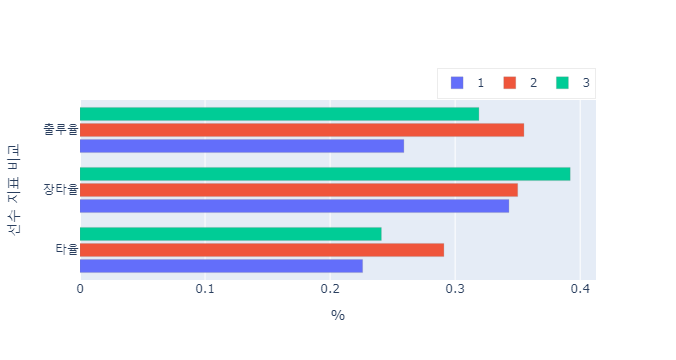

In [73]:
# 타자

def vs_hit_bar(*stat_list):

    players = [1, 2, 3]
    indicators = ['타율', '장타율', '출루율']
    
    fig = go.Figure()    
    bar_width = 0.22
    stat_list1 = [stat_list[k][:2] + stat_list[k][5:] for k in range(len(stat_list))]

    for i, player in enumerate(players):
        fig.add_trace(go.Bar(x=stat_list1[i], 
                            y=indicators,
                            name=player,
                            orientation='h',
                            width=bar_width,
                            marker=dict(color=player,
                                       line=dict(color='gray', width=bar_width))))
    
    fig.update_layout(barmode='group',
                      xaxis_title='%',
                      yaxis_title='선수 지표 비교',
                      legend=dict(orientation='h',
                                  borderwidth=0.1,
                                  x=1,
                                  y=1.01,
                                  xanchor='right',
                                  yanchor='bottom',
                                 ))
    
    
    
    fig.show()
    
vs_hit_bar([0.226,0.343,0.214,0.000,0.000,0.259], [0.291,0.350,0.633,0.000,0.000,0.355], [0.241,0.392,0.431,0.000,0.000,0.319])

In [219]:
total_pit = pd.read_csv('pit_total.csv', index_col=False).drop('idx', axis=1)
total_pit

,code,era,kpit,kbb,wpa,re24,whip
0,50030,3.48,0.044,2.203,0.033,0.860,1.332
1,50040,4.11,0.045,2.246,0.036,0.760,1.483
2,50126,4.59,0.042,1.821,0.007,0.560,1.500
3,50157,4.52,0.041,1.926,0.012,0.560,1.539
4,50234,2.79,0.068,4.432,0.080,1.055,1.097
...,...,...,...,...,...,...,...
233,79229,5.31,0.026,1.514,-0.106,-0.670,1.655
234,79764,4.81,0.043,2.508,-0.000,0.525,1.475
235,79847,4.96,0.053,1.812,0.006,0.560,1.497
236,95657,5.48,0.054,2.897,0.031,0.500,1.552


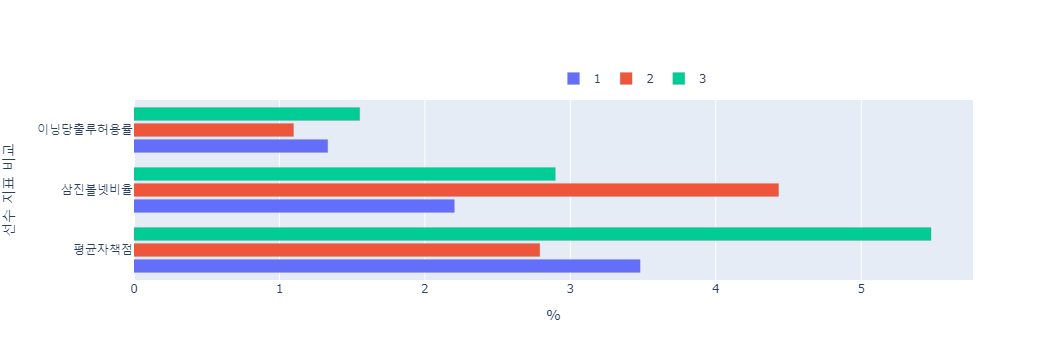

In [247]:
# 투수

def vs_pit_bar(*stat_list):

    players = [1, 2, 3]
    indicators = ['평균자책점', '삼진볼넷비율', '이닝당출루허용률']
    
    fig = go.Figure()
    bar_width = 0.22
    
    stat_list1 = [stat_list[k][:1] + stat_list[k][2:3] + stat_list[k][5:] for k in range(len(stat_list))]

    for i, player in enumerate(players):
        fig.add_trace(go.Bar(x=stat_list1[i], 
                            y=indicators,
                            name=player,
                            orientation='h',
                            width=bar_width,
                            marker=dict(color=player,
                                       line=dict(color='gray', width=bar_width))))

    
    fig.update_layout(barmode='group',
                      xaxis_title='%',
                      yaxis_title='선수 지표 비교',
                      legend=dict(orientation='h',
                                 x=0.5,
                                 y=1.2,))
    
    fig.show()
    
vs_pit_bar([3.48,0.044,2.203,0.033,0.860,1.332], [2.79,0.068,4.432,0.080,1.055,1.097], [5.48,0.054,2.897,0.031,0.500,1.552])

### 선수 별 지표 비교 Bar plot 동적 코딩 및 그래프, 범례 세부 조정

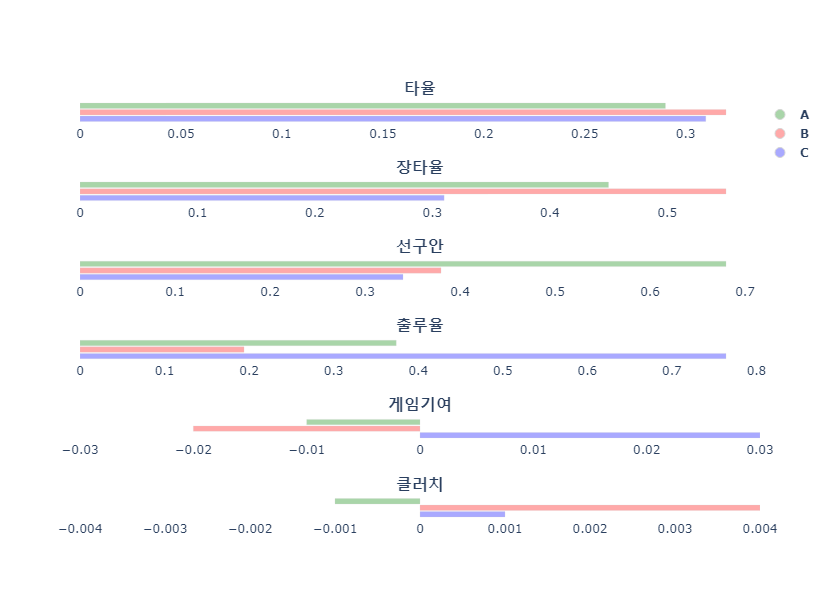

In [162]:
# 타자

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import math
import scipy.stats as stats
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import warnings
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

def convert_to_float(lst):
    return [float(x) for x in lst]

def move_item(lst):
    item = lst.pop(5)  # 5번째 항목 추출
    lst.insert(3, item)  # 4번째 자리에 삽입
    
    rest = lst[5:]  # 5번째 항목 이후의 항목 추출
    del lst[5:]  # 추출한 항목들 삭제
    lst.extend(rest)  # 추출한 항목들을 뒤로 이동
    
    return lst

def visualize(L):
    global indices
    colors = ['Green', 'Red', 'blue']
    pithit = L[1]
    lenL = int((len(L)-2) / 7)
    inputs = []
    for split in range(lenL):
        smallL = L[2+(split*7):9+(split*7)]
        inputs.append(smallL)
    
    names = []
    sc = []
    for input in inputs:
        sc.append(move_item(convert_to_float(input[:6])))
        names.append(input[-1])
    
    if not pithit == 'hit': 
        colnames = ['평균자책점', '구위', '제구력', '출루허용률', '게임기여', '클러치' ]

    else:
        colnames = ['타율', '장타율', '선구안', '출루율', '게임기여', '클러치' ]
    
    subplot_titles = [f"<b>{title}</b>" for title in colnames]
    names = [f"<b>{title}</b>" for title in names]
    fig = make_subplots(rows=len(colnames), cols=1, subplot_titles=subplot_titles, vertical_spacing = 0.13)
    

    bar_width = 0.22
   
    for i, col in enumerate(colnames):
        col = colnames[i]
        for j in range(len(sc)-1, -1, -1):
            player = sc[j]
            if i == 4 or i == 5:  # Check if it's the 5th or 6th column
                fig.add_trace(go.Bar(
                    x=[sc[j][i]],
                    y=[-1],  # Set the y-value to -1 to position the bar above the other bars
                    name=names[j],
                    orientation='h',
                    width=bar_width,
                    showlegend=False,
                    opacity=1 / (len(sc)),
                    marker=dict(color=colors[j], line=dict(color='gray', width=bar_width))
                ), row=i + 1, col=1)
            else:
                fig.add_trace(go.Bar(
                    x=[sc[j][i]],
                    name=names[j],
                    orientation='h',
                    width=bar_width,
                    showlegend=False,
                    opacity=1 / (len(sc)),
                    marker=dict(color=colors[j], line=dict(color='gray', width=bar_width))
                ), row=i + 1, col=1)
    
            fig.update_yaxes(visible=False, row=i + 1, col=1)
    
            if i == 4 or i == 5:  # Check if it's the 5th or 6th column
                sc_values = [item[i] for item in sc]  # Extract the values from the specific column
                max_value = max(abs(value) for value in sc_values)  # Find the maximum absolute value
                fig.update_xaxes(showgrid = False, range=[-max_value, max_value], row=i + 1, col=1)  # Set x-axis range to -max to max
            else:
                fig.update_xaxes(showgrid = False, visible=True, row=i + 1, col=1)  # Keep the default x-axis range

    if pithit == 'hit':
        fig.update_layout(
            barmode='group',
            xaxis=dict(
                tickmode='linear',
                dtick=0.05
                #color='grey'
            ),
            plot_bgcolor='rgba(0, 0, 0, 0)',
            paper_bgcolor='rgba(0, 0, 0, 0)',
            height=100 * len(colnames),
            showlegend=False
        )
    else:
        fig.update_layout(
            barmode='group',
            xaxis=dict(
                tickmode='linear'
                #dtick=0.05
                #color='grey'
            ),
            plot_bgcolor='rgba(0, 0, 0, 0)',
            paper_bgcolor='rgba(0, 0, 0, 0)',
            height=100 * len(colnames),
            showlegend=False
        )
    
    fig.update_traces(hovertemplate='%{x:.3f}')
    
      # Create custom legend
    legend_labels = names
    legend_colors = colors[:len(names)]
    custom_legend = [go.Scatter(
            x=[None], y=[None],  # Use dummy values
            mode='markers',
            marker=dict(
            color=color,
            opacity=1/(len(sc)),
            size=10,
            line=dict(color='gray', width=1)
        ),
        name=label
    ) for color, label in zip(legend_colors, legend_labels)]

    fig.add_traces(custom_legend)

    fig.update_layout(
        showlegend=True,  # Show the custom legend
        legend=dict(
            x=1,  # Adjust the x position of the custom legend
            y=1,  # Adjust the y position of the custom legend
            font=dict(size=12),  # Adjust the font size of the custom legend
            xanchor='left',
            yanchor='auto',
        )
    )

    fig.show()

#L = ['hex_visualize.py', 'pit', '3.48','0.044','2.203','0.033','0.860','1.332', '양현종', '2.79','0.068','4.432','0.080','1.055','1.097', '김광현' , '5.48','0.054','2.897','0.031','0.500','1.552', '류현진']
L = ['hex_visualize.py', 'hit', '0.290', '0.450', '0.680', '-0.01', '-0.001', '0.374', 'A', '0.320', '0.550', '0.380', '-0.02', '+0.004', '0.194', 'B' , '0.310', '0.310', '0.340', '0.03', '+0.001', '0.764', 'C']
visualize(L)